In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt 

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_size = 784 #given by picture size 28x28 
hidden_size = 100
num_classes = 10 # digits from 0 to 9
num_epochs = 1
batch_size = 100
lr = 0.001

In [3]:
import torch.utils
import torch.utils.data
import torch.utils.data.dataloader


train_data = torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(), download=True)
test_data = torchvision.datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_data,batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data,batch_size=batch_size, shuffle=False)



In [4]:
examples = iter(train_loader)
samples, labels = examples.__next__()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


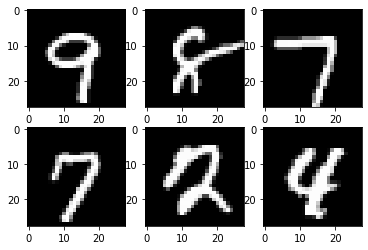

In [5]:
for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(samples[i][0], cmap='gray')

plt.show()

In [6]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size,num_classes)


    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return(out)
    
model = NeuralNet(input_size=input_size,hidden_size=hidden_size,num_classes=num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [7]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)

        #forward
        output = model.forward(images)
        l = criterion(output, labels)

        #backward
        optimizer.zero_grad()
        l.backward()
        optimizer.step()

        if i % 100 == 0:

            print(f'epoch: {epoch+1}, step: {((i+1)/n_total_steps):.4}, loss:{l:.4f}')
        

epoch: 1, step: 0.001667, loss:2.3150
epoch: 1, step: 0.1683, loss:0.3762
epoch: 1, step: 0.335, loss:0.3033
epoch: 1, step: 0.5017, loss:0.2450
epoch: 1, step: 0.6683, loss:0.2837
epoch: 1, step: 0.835, loss:0.3317


In [8]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()


In [9]:
acc = 100.0 * n_correct / n_samples
print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 93.7 %
